# Idea: Exploratory Data Analysis (EDA) on Retail Sales Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Cleaning

In [2]:
data = pd.read_csv('retail_sales_dataset.csv')
df=pd.DataFrame(data)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [5]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
null_values=df.isnull().sum()
print(null_values)

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [8]:
df=df[['Customer ID','Gender','Age','Product Category','Quantity','Price per Unit','Total Amount','Transaction ID','Date']]
df.head()

,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Transaction ID,Date
0,CUST001,Male,34,Beauty,3,50,150,1,2023-11-24
1,CUST002,Female,26,Clothing,2,500,1000,2,2023-02-27
2,CUST003,Male,50,Electronics,1,30,30,3,2023-01-13
3,CUST004,Male,37,Clothing,1,500,500,4,2023-05-21
4,CUST005,Male,30,Beauty,2,50,100,5,2023-05-06


In [9]:
#data preprocessing
df.isnull().sum()

Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Transaction ID      0
Date                0
dtype: int64

In [10]:
Quantity_in_stock = df['Quantity'] * df['Price per Unit']
df.insert(loc=5, column='Quantity_in_stock', value=Quantity_in_stock)
nev_df=df[['Customer ID','Gender','Age','Product Category','Quantity','Price per Unit','Total Amount','Transaction ID','Date']]
nev_df2=df.copy()
nev_df.head()

,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Transaction ID,Date
0,CUST001,Male,34,Beauty,3,50,150,1,2023-11-24
1,CUST002,Female,26,Clothing,2,500,1000,2,2023-02-27
2,CUST003,Male,50,Electronics,1,30,30,3,2023-01-13
3,CUST004,Male,37,Clothing,1,500,500,4,2023-05-21
4,CUST005,Male,30,Beauty,2,50,100,5,2023-05-06


# Exploratory Data Analysis

In [11]:
#Grouping  Gender by TotalAmount of Product Category
age_price = df.groupby('Age')['Quantity'].sum().sort_values(ascending=False)

age_price                           

Age
43    89
51    84
34    72
47    72
64    70
54    69
57    68
46    65
42    65
22    65
35    64
52    63
62    63
27    60
30    60
31    60
28    58
19    57
23    57
60    56
18    54
26    53
40    52
63    50
21    50
49    50
50    50
38    47
37    47
20    47
55    47
25    46
53    46
39    45
32    45
56    44
36    43
29    42
48    42
61    42
41    42
59    41
44    39
45    37
24    36
58    34
33    26
Name: Quantity, dtype: int64

# Visualization:

<Axes: xlabel='Age'>

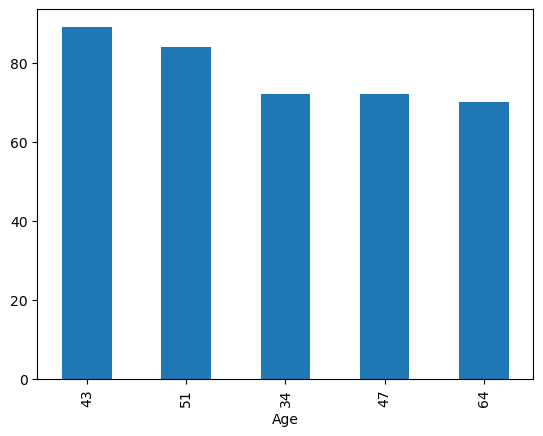

In [12]:
#Top 5 Customer ID with high number of Purchase
age_price[:5].plot(kind = 'bar')

<Axes: xlabel='Age'>

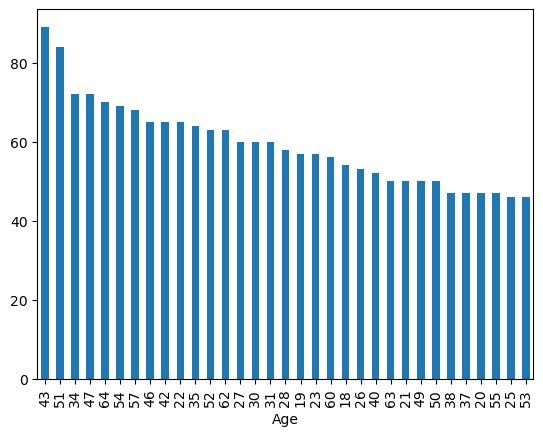

In [14]:
 #5 Customer ID with least number of Purchase
age_price[:33].plot(kind = 'bar')

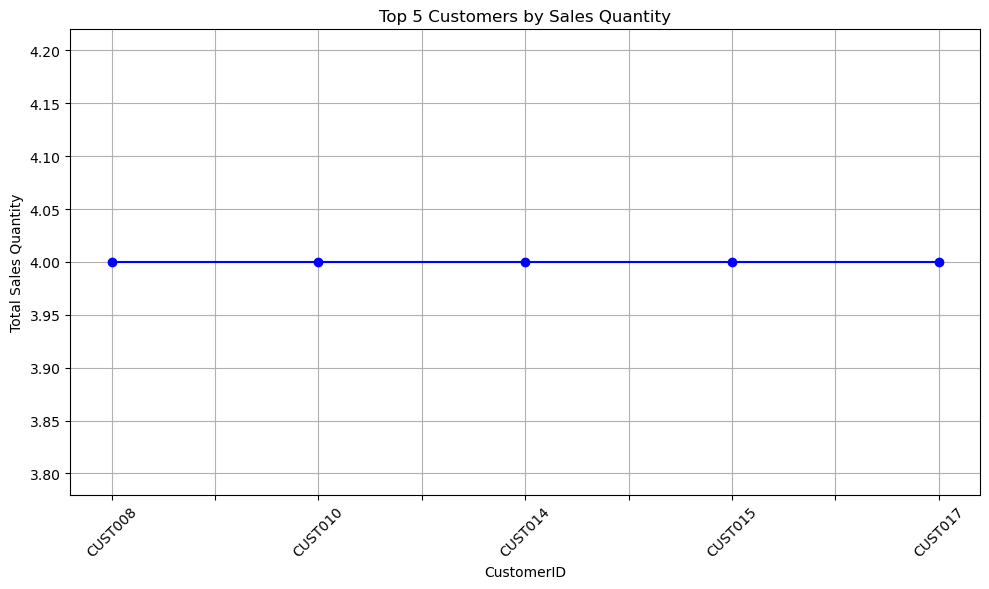

In [15]:
import matplotlib.pyplot as plt

# Assuming nev_df2 is your DataFrame and it contains relevant columns like 'CustomerID', 'Quantity', 'Price per Unit'

# Example: Line plot of total sales quantity per CustomerID (top 5)
top_customers = nev_df2.groupby('Customer ID')['Quantity'].sum().nlargest(5)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Top 5 Customers by Sales Quantity')
plt.xlabel('CustomerID')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


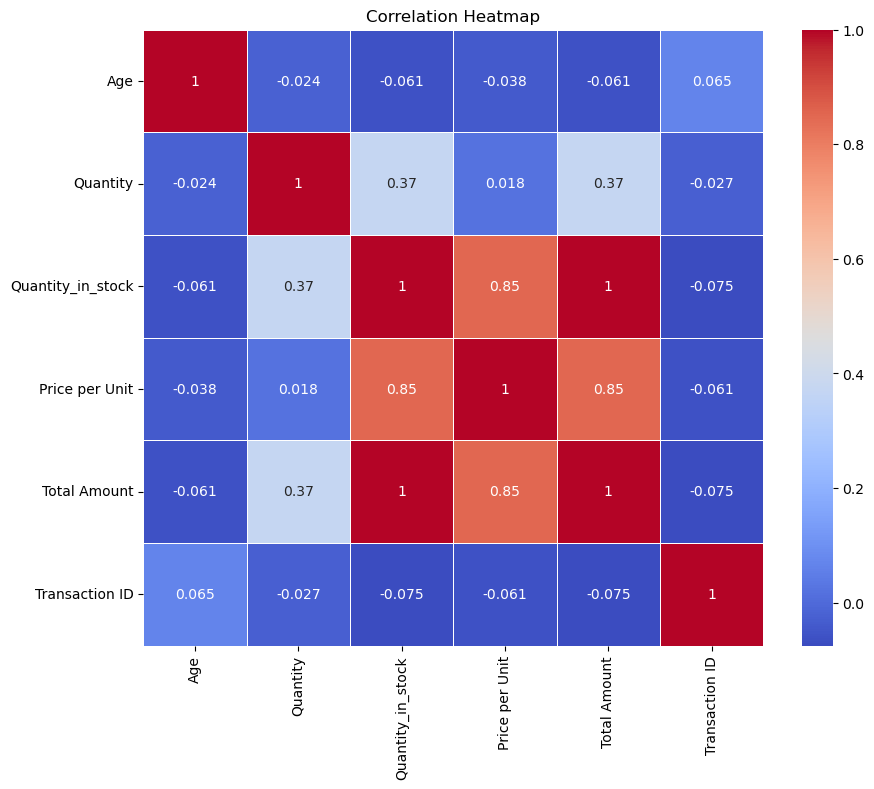

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming nev_df2 is your DataFrame and it contains relevant numeric columns for correlation
# Filter numeric columns if needed
numeric_columns = nev_df2.select_dtypes(include=['int64', 'float64']).columns

# Create correlation matrix
correlation_matrix = nev_df2[numeric_columns].corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


# Time Series Analysis:

In [17]:
# Ensure the 'Date' column is in datetime format
nev_df['Date'] = pd.to_datetime(nev_df['Date'], errors='coerce')

# Extract the year from the 'Date' column
nev_df['Year'] = nev_df['Date'].dt.year

# Display the first few rows of the DataFrame
nev_df.head()


C:\Users\cw\AppData\Local\Temp\ipykernel_25152\1144818697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nev_df['Date'] = pd.to_datetime(nev_df['Date'], errors='coerce')


,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Transaction ID,Date,Year
0,CUST001,Male,34,Beauty,3,50,150,1,2023-11-24,2023
1,CUST002,Female,26,Clothing,2,500,1000,2,2023-02-27,2023
2,CUST003,Male,50,Electronics,1,30,30,3,2023-01-13,2023
3,CUST004,Male,37,Clothing,1,500,500,4,2023-05-21,2023
4,CUST005,Male,30,Beauty,2,50,100,5,2023-05-06,2023


<Axes: xlabel='Year'>

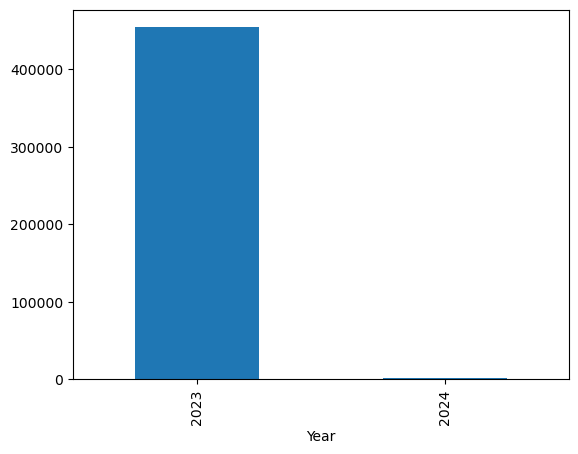

In [18]:
#Total sales for different year
nev_df.groupby('Year')['Total Amount'].sum().plot(kind = 'bar')

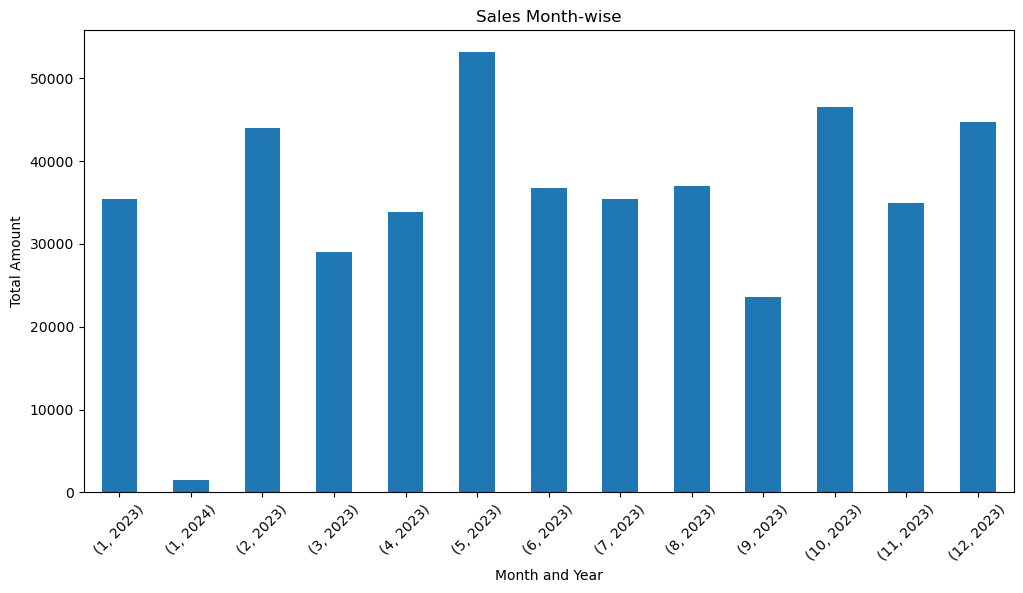

In [19]:
#Sales for different months

# Assuming 'Date' column is already in datetime format
# If not, convert it to datetime first: nev_df['Date'] = pd.to_datetime(nev_df['Date'], errors='coerce')

# Extract month (numeric)
nev_df['Mon'] = nev_df['Date'].dt.month

# Extract month name
nev_df['month'] = nev_df['Date'].dt.month_name()

# Group by month and year, summing 'Total Amount'
monthly_sales = nev_df.groupby(['Mon', 'Year'])['Total Amount'].sum()

# Plotting
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', title='Sales Month-wise')
plt.xlabel('Month and Year')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()


In [20]:
#checking why dec 2023  has a drop comparing to nov 2023

get_2023 = nev_df[(nev_df['Year']==2023)]
get_dec2023 = get_2023[(nev_df['month']=='December')]
get_dec2023 = get_dec2023['Date'].dt.date.unique()
get_dec2023

C:\Users\cw\AppData\Local\Temp\ipykernel_25152\2148214968.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  get_dec2023 = get_2023[(nev_df['month']=='December')]


array([datetime.date(2023, 12, 13), datetime.date(2023, 12, 26),
       datetime.date(2023, 12, 24), datetime.date(2023, 12, 27),
       datetime.date(2023, 12, 5), datetime.date(2023, 12, 10),
       datetime.date(2023, 12, 16), datetime.date(2023, 12, 19),
       datetime.date(2023, 12, 17), datetime.date(2023, 12, 2),
       datetime.date(2023, 12, 15), datetime.date(2023, 12, 4),
       datetime.date(2023, 12, 20), datetime.date(2023, 12, 29),
       datetime.date(2023, 12, 9), datetime.date(2023, 12, 11),
       datetime.date(2023, 12, 1), datetime.date(2023, 12, 23),
       datetime.date(2023, 12, 12), datetime.date(2023, 12, 3),
       datetime.date(2023, 12, 8), datetime.date(2023, 12, 6),
       datetime.date(2023, 12, 18), datetime.date(2023, 12, 28),
       datetime.date(2023, 12, 14), datetime.date(2023, 12, 7),
       datetime.date(2023, 12, 22), datetime.date(2023, 12, 25),
       datetime.date(2023, 12, 31), datetime.date(2023, 12, 21)],
      dtype=object)

In [21]:
nev_df.head()

,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Transaction ID,Date,Year,Mon,month
0,CUST001,Male,34,Beauty,3,50,150,1,2023-11-24,2023,11,November
1,CUST002,Female,26,Clothing,2,500,1000,2,2023-02-27,2023,2,February
2,CUST003,Male,50,Electronics,1,30,30,3,2023-01-13,2023,1,January
3,CUST004,Male,37,Clothing,1,500,500,4,2023-05-21,2023,5,May
4,CUST005,Male,30,Beauty,2,50,100,5,2023-05-06,2023,5,May


In [22]:
nev_df = nev_df.dropna()
nev_df.isnull().sum()

Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Transaction ID      0
Date                0
Year                0
Mon                 0
month               0
dtype: int64

# Customer and Product Analysis:

<Axes: title={'center': 'Most Customers for Product Category'}, xlabel='Product Category'>

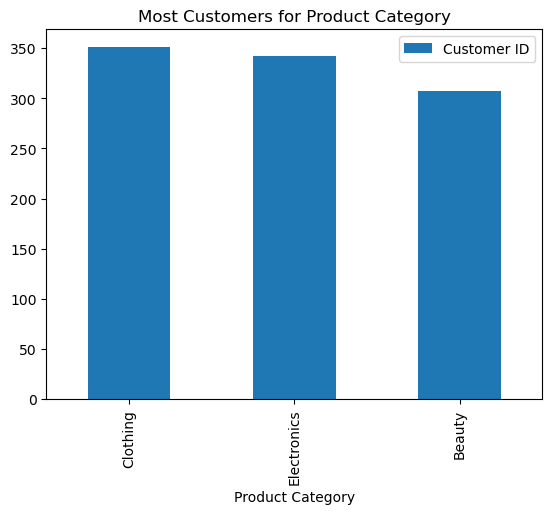

In [23]:
#Product Category with more number of customers
cus_id = pd.DataFrame(nev_df.groupby('Product Category')['Customer ID'].count().sort_values(ascending=False))
cus_id[:5].plot(kind = 'bar',title = 'Most Customers for Product Category')

<Axes: title={'center': 'Least Customers for Product Category'}, xlabel='Product Category'>

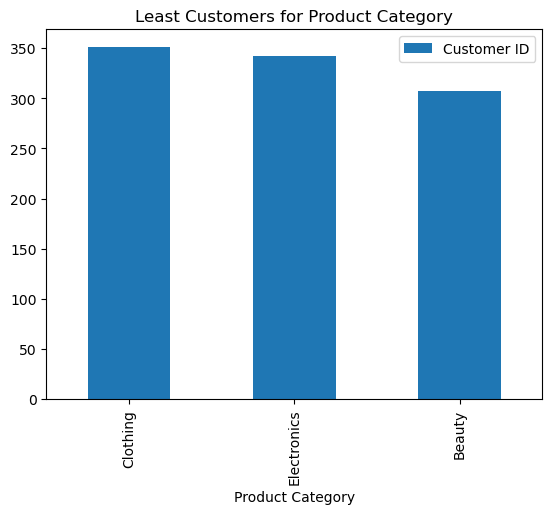

In [24]:
#Product Category with less number of customers
cus_id[-5:].plot(kind = 'bar',title = 'Least Customers for Product Category')

In [25]:
#removing null values since we are checking  the data based on customer and description
nev_df2 = nev_df2.dropna()
nev_df2.isnull().sum()
nev_df2.head()

,Customer ID,Gender,Age,Product Category,Quantity,Quantity_in_stock,Price per Unit,Total Amount,Transaction ID,Date
0,CUST001,Male,34,Beauty,3,150,50,150,1,2023-11-24
1,CUST002,Female,26,Clothing,2,1000,500,1000,2,2023-02-27
2,CUST003,Male,50,Electronics,1,30,30,30,3,2023-01-13
3,CUST004,Male,37,Clothing,1,500,500,500,4,2023-05-21
4,CUST005,Male,30,Beauty,2,100,50,100,5,2023-05-06


In [26]:
#Sales Average of each product
# Assuming nev_df2 is your DataFrame and it contains relevant columns like 'Transaction ID', 'Price per Unit', 'Quantity', 'Quantity_in_stock'

# Calculate average sales quantity per product
avg_sales = nev_df2.groupby(['Transaction ID', 'Price per Unit'])[['Quantity', 'Quantity_in_stock']].mean().sort_values(by='Quantity', ascending=False)

avg_sales


,,Quantity,Quantity_in_stock
Transaction ID,Price per Unit,,
1000,30,4.0,120.0
756,300,4.0,1200.0
262,30,4.0,120.0
614,300,4.0,1200.0
615,25,4.0,100.0
...,...,...,...
309,25,1.0,25.0
784,500,1.0,500.0
783,300,1.0,300.0


# Descriptive Statistics: Calculate basic statistics (mean, median, mode)

In [27]:
# Assuming nev_df2 is your DataFrame and it contains relevant columns like 'Transaction ID', 'Description', 'Quantity'

# Calculate mean sales quantity per product
mean_sales = nev_df2.groupby(['Transaction ID', 'Total Amount'])['Quantity'].mean()

# Print or display the mean sales quantities
print(mean_sales)


Transaction ID  Total Amount
1               150             3.0
2               1000            2.0
3               30              1.0
4               500             1.0
5               100             2.0
                               ... 
996             50              1.0
997             90              3.0
998             100             4.0
999             150             3.0
1000            120             4.0
Name: Quantity, Length: 1000, dtype: float64


In [28]:
# Assuming nev_df2 is your DataFrame and it contains relevant columns like 'Transaction ID', 'Description', 'Quantity'

# Calculate median sales quantity per product
median_sales = nev_df2.groupby(['Transaction ID', 'Price per Unit'])['Quantity'].median()

# Print or display the median sales quantities
print(median_sales)


Transaction ID  Price per Unit
1               50                3.0
2               500               2.0
3               30                1.0
4               500               1.0
5               50                2.0
                                 ... 
996             50                1.0
997             30                3.0
998             25                4.0
999             50                3.0
1000            30                4.0
Name: Quantity, Length: 1000, dtype: float64


In [29]:
# Assuming nev_df2 is your DataFrame and it contains relevant columns like 'Transaction ID', 'Description', 'Quantity'

# Calculate mode sales quantity per product
mode_sales = nev_df2.groupby(['Transaction ID', 'Total Amount'])['Quantity'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Print or display the mode sales quantities
print(mode_sales)


Transaction ID  Total Amount
1               150             3
2               1000            2
3               30              1
4               500             1
5               100             2
                               ..
996             50              1
997             90              3
998             100             4
999             150             3
1000            120             4
Name: Quantity, Length: 1000, dtype: int64


# Recommendations

C:\Users\cw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


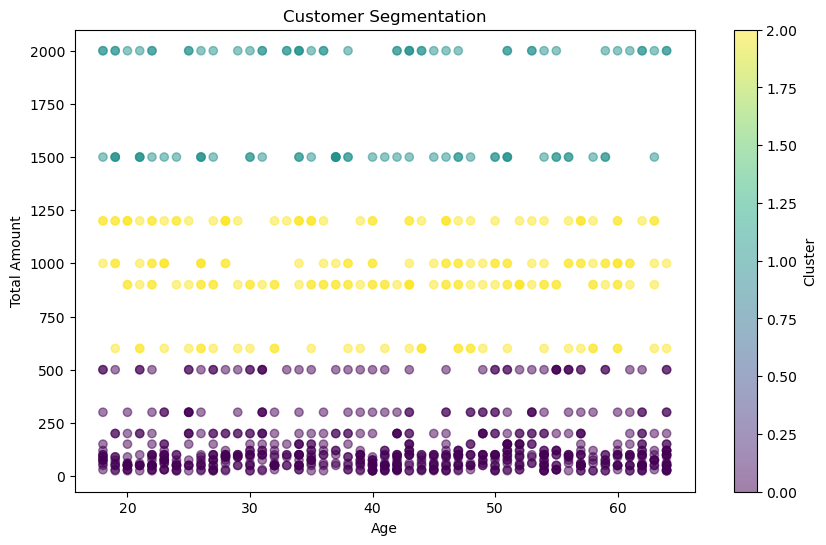

In [31]:
#Customer Segmentation for Targeted Marketing
# Example: Customer segmentation using K-means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = nev_df2[['Age', 'Quantity', 'Total Amount']]

# Define the number of clusters (adjust as per your analysis)
kmeans = KMeans(n_clusters=3, random_state=42)
nev_df2['Cluster'] = kmeans.fit_predict(X)

# Visualize customer segments
plt.figure(figsize=(10, 6))
plt.scatter(nev_df2['Age'], nev_df2['Total Amount'], c=nev_df2['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.colorbar(label='Cluster')
plt.show()


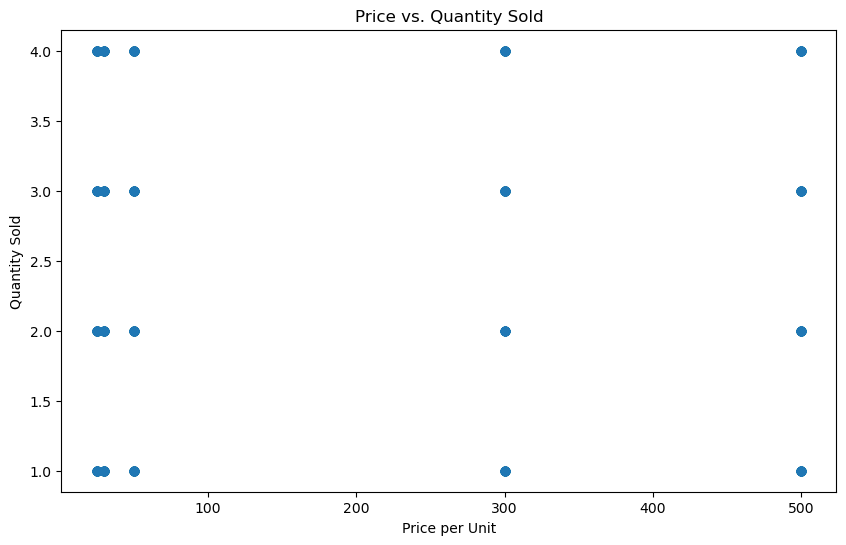

In [32]:
#Price Optimization and Discount Strategies
# Assuming nev_df2 contains 'Price per Unit', 'Quantity', 'Total Amount' columns

# Calculate price elasticity or analyze price vs. quantity sold relationships

# Visualize price vs. quantity relationship
plt.figure(figsize=(10, 6))
plt.scatter(nev_df2['Price per Unit'], nev_df2['Quantity'], alpha=0.5)
plt.title('Price vs. Quantity Sold')
plt.xlabel('Price per Unit')
plt.ylabel('Quantity Sold')
plt.show()


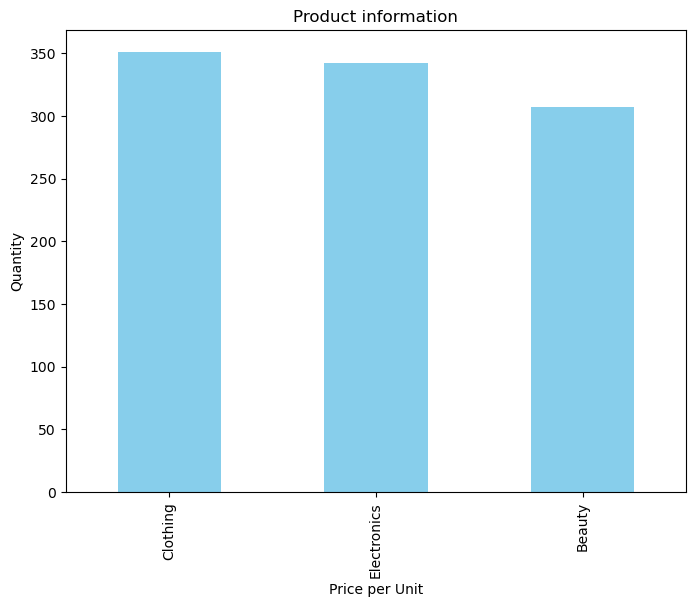

In [33]:
#Customer Retention and Satisfaction
# Example: Analyzing customer satisfaction and loyalty
# Assuming nev_df2 contains 'CustomerID', 'Returns', 'Reviews' columns

# Calculate return rates and analyze customer reviews

# Visualize customer satisfaction metrics
plt.figure(figsize=(8, 6))
nev_df2['Product Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Product information')
plt.xlabel('Price per Unit')
plt.ylabel('Quantity')
plt.show()

C:\Users\cw\AppData\Local\Temp\ipykernel_25152\2034704293.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer ID', y='Total Amount', data=nev_df2, estimator=sum, ci=None)


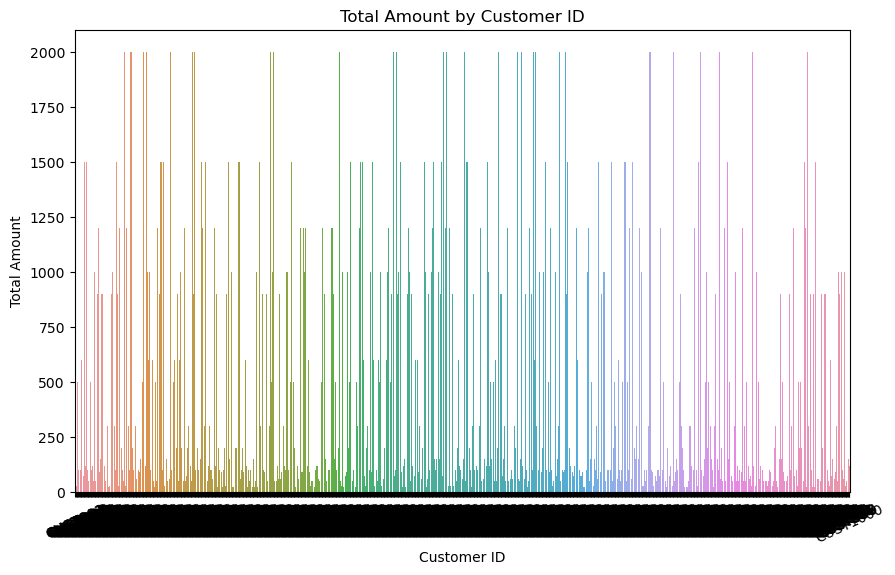

In [34]:
#Market Expansion Opportunities

# Visualize market segments
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer ID', y='Total Amount', data=nev_df2, estimator=sum, ci=None)
plt.title('Total Amount by Customer ID')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount')
plt.xticks(rotation=25)
plt.show()